In [84]:
import typing

from os import mkdir
from os.path import isdir, join as join_path
from functools import partial

import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D


np.random.seed(200)          # Для воспроизводимости результатов

DATA_DIR = 'homework_data/'  # Папка, куда мы будем сохранять все файлы
if not isdir(DATA_DIR):
    mkdir(DATA_DIR)

to_data_dir = partial(join_path, DATA_DIR)  # Склеивает путь к DATA_DIR с именем файла
print(f"Пример работы функции 'to_data_dir': {to_data_dir('test.file')}")

%matplotlib inline

Пример работы функции 'to_data_dir': homework_data/test.file


In [159]:
def generate_brownian(sigma: typing.Union[int, float, complex] = 1,
                      *,
                      n_proc: typing.Union[int] = 10,
                      n_dims: typing.Union[int] = 2,
                      n_steps: typing.Union[int] = 100) -> np.ndarray:
    """
    :param sigma:    стандартное отклонение нормального распределения,
                     генерирующего пошаговые смещения координат
    :param n_proc:   число процессов для генерации, т.е. число частиц
    :param n_dims:   количество пространственных измерений для генерации процесса 
    :param n_steps:  количество последовательных изменений координат (шагов), приходящихся на один процесс

    :return:         np.ndarray размера (n_proc, n_dims, n_steps), содеражщий на позиции
                     [i,j,k] значение j-й координаты i-й частицы на k-м шаге.
    """
    if not np.issubdtype(type(sigma), np.number):
        raise TypeError("Параметр 'sigma' должен быть числом")
    # допишем проверку типов параметров   
    if not np.issubdtype(type(n_proc), np.number):
        raise TypeError("Параметр 'n_proc' должен быть ЦЕЛЫМ числом")
        
    if not np.issubdtype(type(n_dims), np.number):
        raise TypeError("Параметр 'n_dims' должен быть ЦЕЛЫМ числом")
        
    if not np.issubdtype(type(n_steps), np.number):
        raise TypeError("Параметр 'n_steps' должен быть ЦЕЛЫМ числом")
        
        
        
    
    result = np.zeros((n_proc, n_dims, n_steps))
    
    coordinate_change = scs.norm.rvs(size = (n_steps - 1) * n_dims * n_proc, loc = 0, scale = sigma) 
    # массив приращений координат
    # при этом распределение приращений будет Norm(0,𝜎2)
    
    counter = 0; #счетчик для бега по массиву приращений координат
    
    for k in range(1, n_steps): #начинаем со второго, в начале все были в центре координат
        for i in range(0, n_proc):
            for j in range(0, n_dims):
                result[i][j][k] = result[i][j][k-1] + coordinate_change[counter]
                counter += 1
                
    # каждую итерацию просто добавляем приращения к координате частицы

    return result

result = generate_brownian(sigma = 1, n_proc = 9, n_dims = 2, n_steps = 1500)
#print(result)

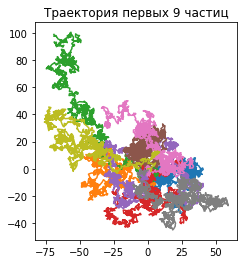

In [160]:
# графики для двухмерного случая
plt.figure()
plt.axes().set_aspect(1)

for i in range(0, 9):
    plt.plot(result[i][0], result[i][1])
    
plt.title('Траектория первых 9 частиц')
plt.show()

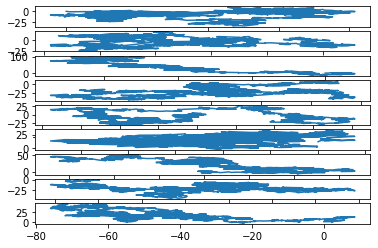

In [189]:
# разные графики
fig, axs = plt.subplots(9)

for i in range(0, 9):
    axs[i].plot(result[i][0], result[i][1])
    
plt.show()
    